# Train Data untuk prediksi #

In [29]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,roc_auc_score,classification_report,roc_curve,auc)
from imblearn.over_sampling import SMOTE

In [30]:
# Load Data
data = pd.read_csv('/content/application_train.csv')
print("Ukuran data:", data.shape)

Ukuran data: (307511, 122)


In [31]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Periksa kolom pada data
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [33]:
# Cek duplikasi data
duplicates = data.duplicated().sum()
print('baris data terduplikat:',duplicates)

baris data terduplikat: 0


In [34]:
# Statistik deskriptif data
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [35]:
print(data['CODE_GENDER'].value_counts())

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


In [36]:
data = data[data['CODE_GENDER'] != 'XNA']

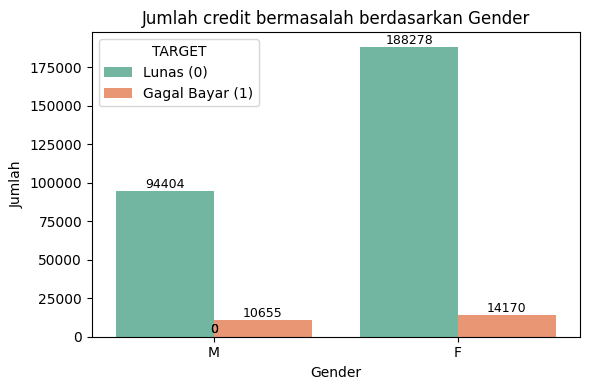

In [37]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='CODE_GENDER', hue='TARGET', data=data, palette='Set2')

# Tambahkan label angka di atas bar
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height + 200),
                ha='center', va='bottom', fontsize=9)

plt.title('Jumlah credit bermasalah berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.legend(title='TARGET', labels=['Lunas (0)', 'Gagal Bayar (1)'])
plt.tight_layout()
plt.show()


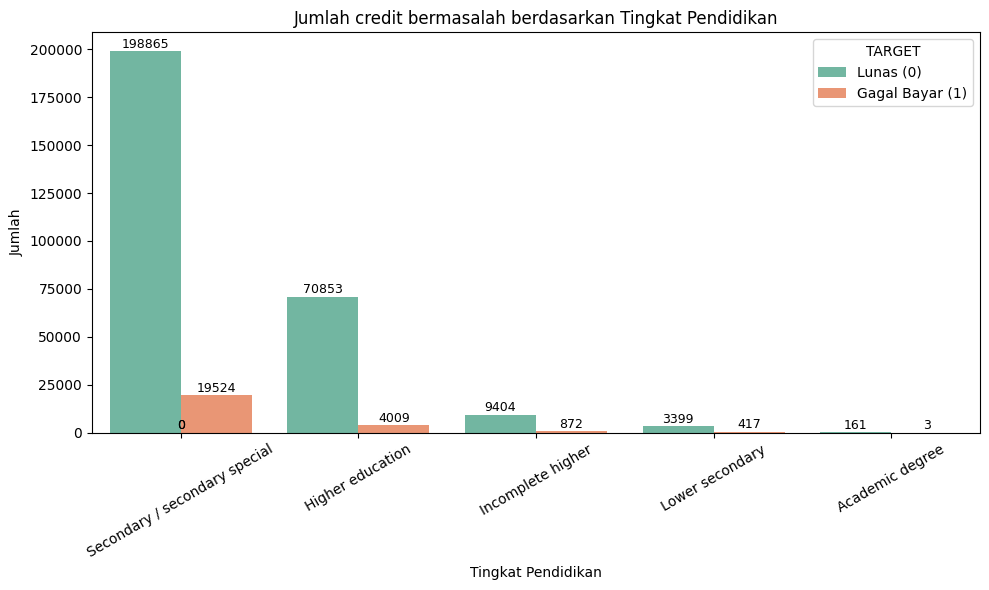

In [38]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='NAME_EDUCATION_TYPE', hue='TARGET', palette='Set2')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height + 200),
                ha='center', va='bottom', fontsize=9)

plt.title('Jumlah credit bermasalah berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah')
plt.xticks(rotation=30)
plt.legend(title='TARGET', labels=['Lunas (0)', 'Gagal Bayar (1)'])
plt.tight_layout()
plt.show()


/tmp/ipython-input-816402796.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=data, palette='Set2')


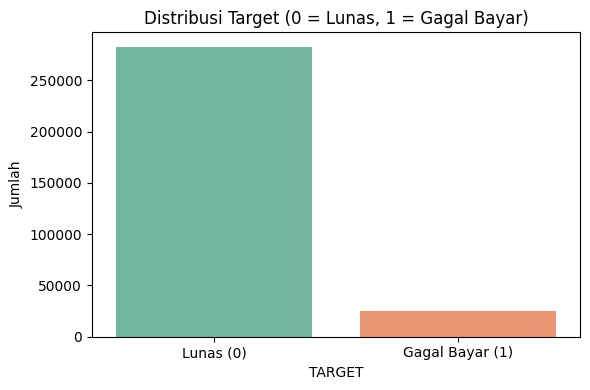

In [39]:
# Distribusi Target
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=data, palette='Set2')
plt.title('Distribusi Target (0 = Lunas, 1 = Gagal Bayar)')
plt.xlabel('TARGET')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Lunas (0)', 'Gagal Bayar (1)'])
plt.tight_layout()
plt.show()

In [40]:
target_counts = data['TARGET'].value_counts(normalize=True) * 100
print("\nDistribusi Target dalam Persen:")
print(target_counts.round(2).astype(str) + ' %')


Distribusi Target dalam Persen:
TARGET
0    91.93 %
1     8.07 %
Name: proportion, dtype: object


Karena target gagal bayar (Target = 1) proporsinya hanya 8.07%, datanya merupakan data imbalance. Akan digunakan SMOTE untuk mengatasi imbalance dataset.

In [41]:
# 4. PILIH FITUR RELEVAN (Feature Selection)
selected_cols = ['TARGET', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH']
df = data[selected_cols].copy()
df

,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,DAYS_BIRTH
0,1,M,202500.0,406597.5,Secondary / secondary special,-9461
1,0,F,270000.0,1293502.5,Higher education,-16765
2,0,M,67500.0,135000.0,Secondary / secondary special,-19046
3,0,F,135000.0,312682.5,Secondary / secondary special,-19005
4,0,M,121500.0,513000.0,Secondary / secondary special,-19932
...,...,...,...,...,...,...
307506,0,M,157500.0,254700.0,Secondary / secondary special,-9327
307507,0,F,72000.0,269550.0,Secondary / secondary special,-20775
307508,0,F,153000.0,677664.0,Higher education,-14966
307509,1,F,171000.0,370107.0,Secondary / secondary special,-11961


In [42]:
# Cek missing value
missing = df.isnull().sum()
print("\nJumlah missing value per kolom sebelum imputasi:",missing)


Jumlah missing value per kolom sebelum imputasi: TARGET                 0
CODE_GENDER            0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
NAME_EDUCATION_TYPE    0
DAYS_BIRTH             0
dtype: int64


In [43]:
# Handling Missing Value
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Imputasi numerik (menggunakan median)
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Imputasi kategorikal (menggunakan modus)
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nSisa missing value setelah imputasi:", df.isnull().sum().sum())


Sisa missing value setelah imputasi: 0


In [44]:
# Feature Engineering
df['AGE_YEARS'] = -df['DAYS_BIRTH'] / 365
df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
df.drop('DAYS_BIRTH', axis=1, inplace=True)


Dipilih fitur-fitur yang relevan untuk pembuatan model

In [45]:
# Encoding
df = pd.get_dummies(df, drop_first=True)

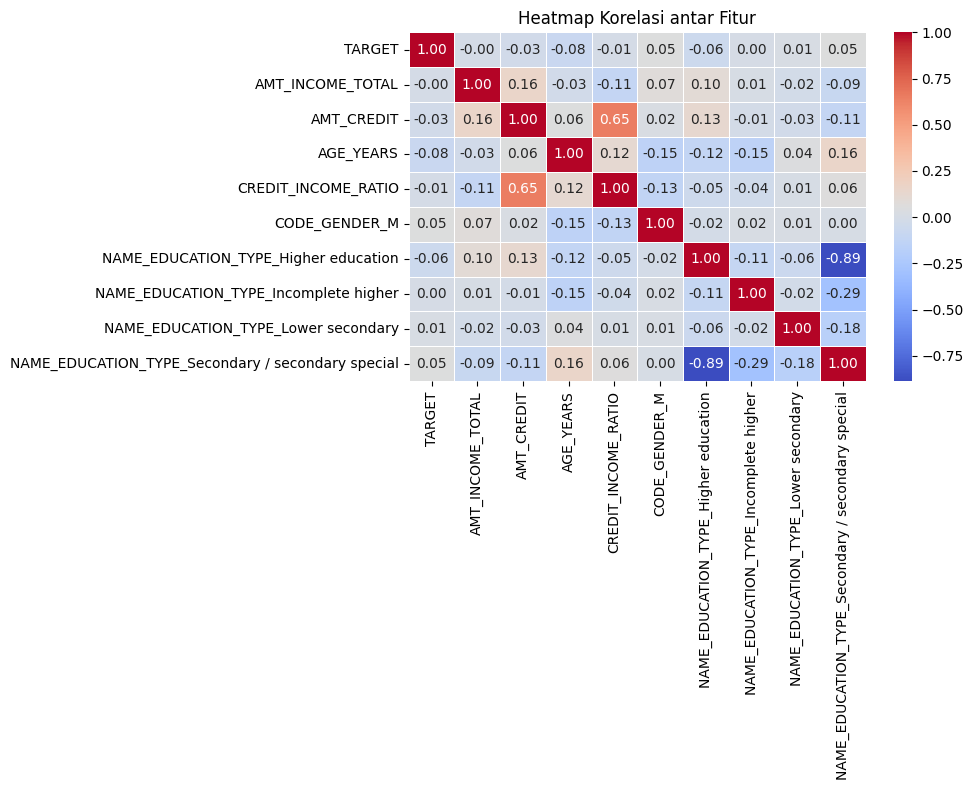

In [46]:
# Heatmap Korelasi
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi antar Fitur')
plt.tight_layout()
plt.show()

In [47]:
# Split Data
X = df.drop('TARGET', axis=1)
y = df['TARGET']

if 'CODE_GENDER_XNA' in X.columns:
    X = X.drop('CODE_GENDER_XNA', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("\nSetelah SMOTE:")
print("Jumlah data kelas 0:", sum(y_train_resampled == 0))
print("Jumlah data kelas 1:", sum(y_train_resampled == 1))


Setelah SMOTE:
Jumlah data kelas 0: 226201
Jumlah data kelas 1: 226201


Digunakan SMOTE untuk masalah imbalance dataset. Jika tidak menggunakan SMOTE model cenderung berfokus pada kelas mayoritas dan kurang peka mendeteksi kelas minoritas. Sehingga digunakan SMOTE agar mengurangi bias pada model terhadap kelas mayoritas. SMOTE bekerja dengan mengambil data minoritas dan membuatnya menjadi contoh untuk data baru sehingga jumlah data mayoritas dan minoritas seimbang.


=== Logistic Regression ===
Accuracy     : 0.5840
Precision    : 0.1147
Recall       : 0.6092
F1 Score     : 0.1930
ROC-AUC      : 0.6274
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.58      0.72     56481
           1       0.11      0.61      0.19      5021

    accuracy                           0.58     61502
   macro avg       0.53      0.60      0.46     61502
weighted avg       0.88      0.58      0.68     61502



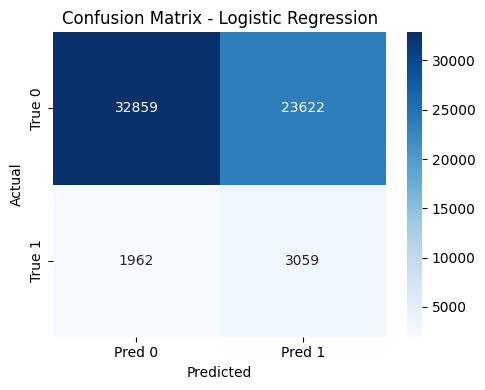


=== Random Forest ===
Accuracy     : 0.8052
Precision    : 0.1069
Recall       : 0.1884
F1 Score     : 0.1364
ROC-AUC      : 0.5564
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89     56481
           1       0.11      0.19      0.14      5021

    accuracy                           0.81     61502
   macro avg       0.51      0.52      0.51     61502
weighted avg       0.86      0.81      0.83     61502



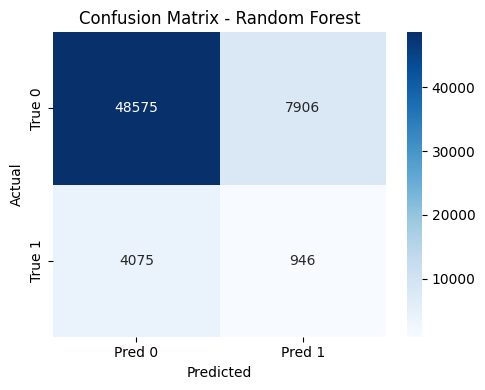

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:34:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
Accuracy     : 0.7160
Precision    : 0.1187
Recall       : 0.3858
F1 Score     : 0.1815
ROC-AUC      : 0.6020
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83     56481
           1       0.12      0.39      0.18      5021

    accuracy                           0.72     61502
   macro avg       0.53      0.57      0.50     61502
weighted avg       0.87      0.72      0.78     61502



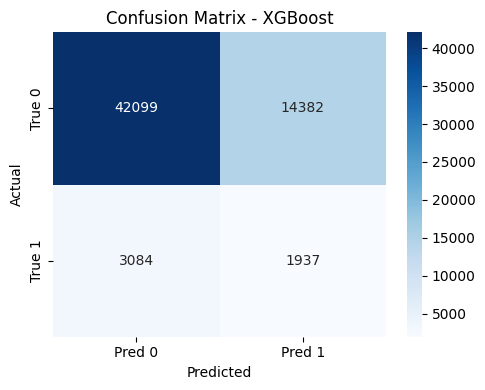

In [50]:
# Machine Learning
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []
roc_curves = {}

from sklearn.metrics import precision_score, recall_score, f1_score

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)

    print(f"\n=== {name} ===")
    print(f"Accuracy     : {acc:.4f}")
    print(f"Precision    : {prec:.4f}")
    print(f"Recall       : {rec:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print(f"ROC-AUC      : {auc_score:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred 0', 'Pred 1'],
                yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # ROC curve data
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curves[name] = (fpr, tpr, auc_score)

    # Simpan semua metrik
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': auc_score
    })


=== THRESHOLD TUNING - Logistic Regression ===
Threshold     : 0.3
Accuracy      : 0.1251
Precision     : 0.0839
Recall        : 0.9791
F1 Score      : 0.1545
Classification Report (Custom Threshold):
              precision    recall  f1-score   support

           0       0.96      0.05      0.09     56481
           1       0.08      0.98      0.15      5021

    accuracy                           0.13     61502
   macro avg       0.52      0.51      0.12     61502
weighted avg       0.89      0.13      0.10     61502



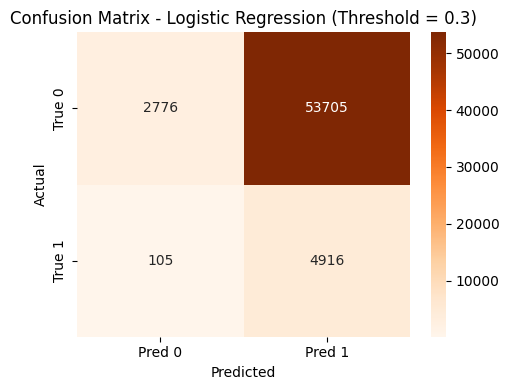

In [51]:
# Tuning Threshlod Logistic Regression
print("\n=== THRESHOLD TUNING - Logistic Regression ===")

logreg_model = models['Logistic Regression']
y_probs_lr = logreg_model.predict_proba(X_test_scaled)[:, 1]
threshold =0.3
y_pred_custom = (y_probs_lr >= threshold).astype(int)

acc_c = accuracy_score(y_test, y_pred_custom)
prec_c = precision_score(y_test, y_pred_custom)
rec_c = recall_score(y_test, y_pred_custom)
f1_c = f1_score(y_test, y_pred_custom)

print(f"Threshold     : {threshold}")
print(f"Accuracy      : {acc_c:.4f}")
print(f"Precision     : {prec_c:.4f}")
print(f"Recall        : {rec_c:.4f}")
print(f"F1 Score      : {f1_c:.4f}")
print("Classification Report (Custom Threshold):")
print(classification_report(y_test, y_pred_custom))

# Confusion matrix threshold tuning
cm_custom = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.title(f'Confusion Matrix - Logistic Regression (Threshold = {threshold})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


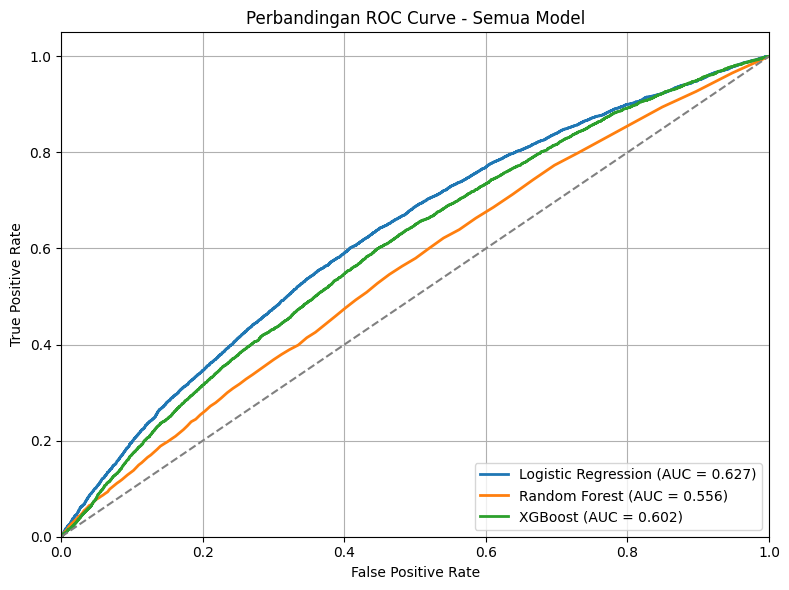

In [52]:
# Kurva ROC
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc_score) in roc_curves.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Perbandingan ROC Curve - Semua Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1650720522.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance (Abs)', y='Feature', data=feat_imp_df.head(10), palette='coolwarm')


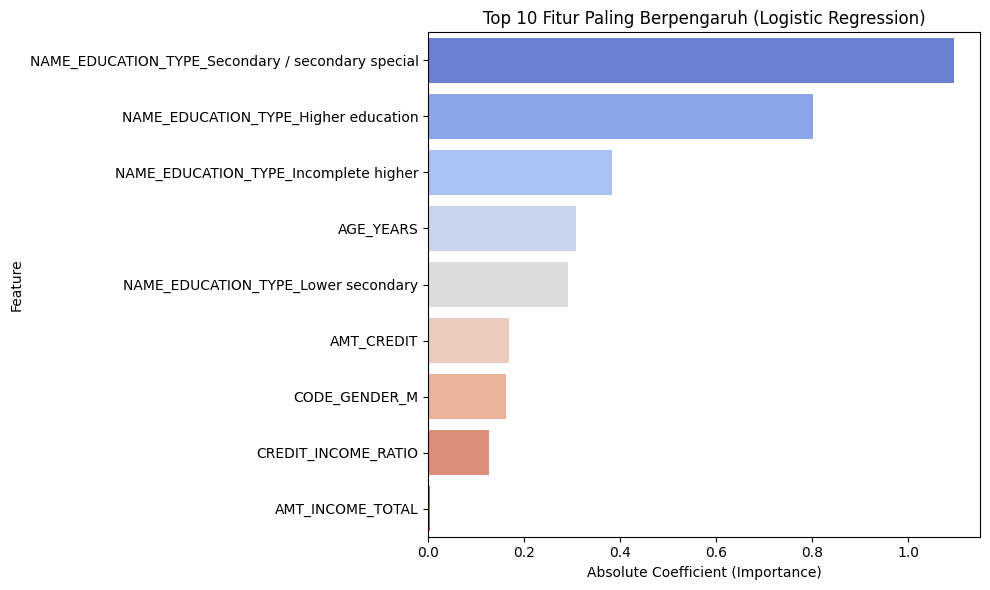

In [53]:
# Feature Importance dari Logistic Regression


logreg_model = models['Logistic Regression']


coefficients = logreg_model.coef_[0]


feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Importance (Abs)': np.abs(coefficients)  # untuk ranking
}).sort_values(by='Importance (Abs)', ascending=False)

# Visualisasi top 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance (Abs)', y='Feature', data=feat_imp_df.head(10), palette='coolwarm')
plt.title('Top 10 Fitur Paling Berpengaruh (Logistic Regression)')
plt.xlabel('Absolute Coefficient (Importance)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [54]:
# Rangkuman hasil
results_df = pd.DataFrame(results)
print("\n=== Rangkuman Evaluasi Model ===")
print(results_df.sort_values(by='ROC-AUC', ascending=False).reset_index(drop=True))



=== Rangkuman Evaluasi Model ===
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.584014   0.114651  0.609241  0.192985  0.627363
1              XGBoost  0.716009   0.118696  0.385780  0.181537  0.602032
2        Random Forest  0.805193   0.106869  0.188409  0.136380  0.556365


## Prediksi Data Baru ##


Contoh hasil prediksi data baru:
   PREDICTED_TARGET  PREDICTION_PROB
0                 0         0.309116
1                 1         0.554356
2                 0         0.354372
3                 0         0.434772
4                 1         0.614312

✅ Hasil prediksi berhasil disimpan sebagai 'hasil_prediksi_test.csv'


/tmp/ipython-input-1775589183.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PREDICTED_TARGET', data=output, palette='Set2')


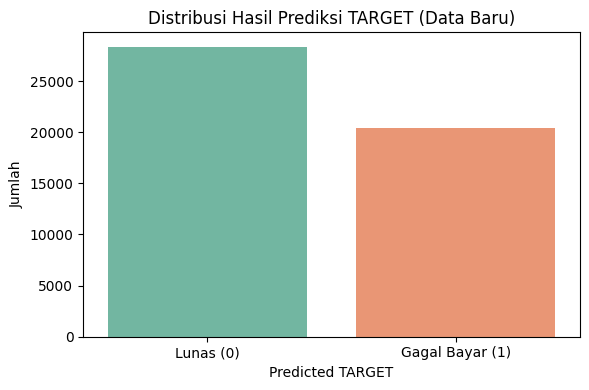


Distribusi Prediksi dalam Persen:
PREDICTED_TARGET
0    58.17 %
1    41.83 %
Name: proportion, dtype: object


In [55]:
# Data Baru
test_data = pd.read_csv('/content/application_test.csv')

selected_cols_test = [col for col in selected_cols if col != 'TARGET']
test_df = test_data[selected_cols_test].copy()

# Imputasi missing value (median untuk numerik, modus untuk kategorik)
for col in test_df.select_dtypes(include=['int64', 'float64']):
    if test_df[col].isnull().sum() > 0:
        test_df[col].fillna(test_df[col].median(), inplace=True)

for col in test_df.select_dtypes(include=['object']):
    if test_df[col].isnull().sum() > 0:
        test_df[col].fillna(test_df[col].mode()[0], inplace=True)

# Feature engineering
test_df['AGE_YEARS'] = -test_df['DAYS_BIRTH'] / 365
test_df['CREDIT_INCOME_RATIO'] = test_df['AMT_CREDIT'] / test_df['AMT_INCOME_TOTAL']
test_df.drop('DAYS_BIRTH', axis=1, inplace=True)

# Encoding
test_df = pd.get_dummies(test_df, drop_first=True)

if 'CODE_GENDER_XNA' in test_df.columns:
    test_df = test_df.drop('CODE_GENDER_XNA', axis=1)

missing_cols = set(X.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0

test_df = test_df[X.columns]

# Scaling
X_test_new_scaled = scaler.transform(test_df)

# Pilih model terbaik (Pakai Logistic Regression based on previous AUC)
if 'models' in locals() and 'Logistic Regression' in models:
    final_model = models['Logistic Regression']
else:
    raise NameError("Logistic Regression model not found. Please ensure the model is trained in previous cells.")

y_test_pred = final_model.predict(X_test_new_scaled)
y_test_prob = final_model.predict_proba(X_test_new_scaled)[:, 1]

output = test_data.copy()
output['PREDICTED_TARGET'] = y_test_pred
output['PREDICTION_PROB'] = y_test_prob

print("\nContoh hasil prediksi data baru:")
print(output[['PREDICTED_TARGET', 'PREDICTION_PROB']].head())

# Simpan hasil
output.to_csv('hasil_prediksi_test.csv', index=False)
print("\n✅ Hasil prediksi berhasil disimpan sebagai 'hasil_prediksi_test.csv'")

# Visualisasi hasil prediksi
plt.figure(figsize=(6, 4))
sns.countplot(x='PREDICTED_TARGET', data=output, palette='Set2')
plt.title('Distribusi Hasil Prediksi TARGET (Data Baru)')
plt.xlabel('Predicted TARGET')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Lunas (0)', 'Gagal Bayar (1)'])
plt.tight_layout()
plt.show()

pred_counts = output['PREDICTED_TARGET'].value_counts(normalize=True) * 100
print("\nDistribusi Prediksi dalam Persen:")
print(pred_counts.round(2).astype(str) + ' %')